In [1]:
import pandas as pd
import pydot
import graphviz
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 16,6
import pandas_datareader as pdr
from keras.utils.vis_utils import plot_model

In [2]:
df = pd.read_csv('TP', na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-15,83.800003,82.150002,82.550003,83.550003,2007841.0,71.511093
2017-05-16,85.949997,83.400002,83.900002,83.849998,5141578.0,71.767860
2017-05-17,86.000000,83.599998,84.000000,85.349998,5499293.0,73.051727
2017-05-18,85.599998,83.500000,84.750000,83.750000,2296399.0,71.682281
2017-05-19,85.449997,83.050003,84.400002,84.150002,6222693.0,72.024635


<AxesSubplot:xlabel='Date'>

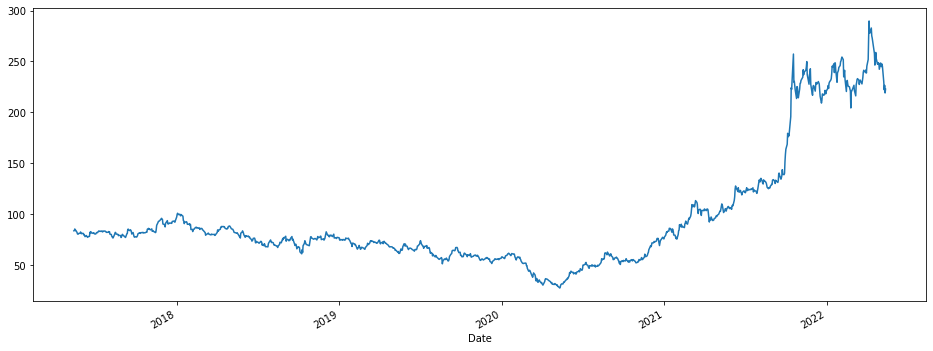

In [3]:
df['Close'].plot()

In [4]:
# Set Target Variable
output_var = pd.DataFrame(df['Close'])
# Selecting features
features = ["Open","Adj Close","Low","Volume"]

In [5]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,Adj Close,Low,Volume
Date,,,,
2017-05-15,0.208601,0.172138,0.217683,0.004359
2017-05-16,0.213693,0.173111,0.222617,0.013058
2017-05-17,0.214070,0.177980,0.223406,0.014051
2017-05-18,0.216899,0.172787,0.223012,0.005160
2017-05-19,0.215579,0.174085,0.221235,0.016060


In [6]:
feature_transform.shape

(1236, 4)

In [7]:
from sklearn.model_selection import TimeSeriesSplit
# Splitting it into Training and testing dataset
timesplit =  TimeSeriesSplit(n_splits=10) # 90-10% split
for train_index, test_index in timesplit.split(feature_transform):
    X_train,X_test = feature_transform[:len(train_index)], feature_transform[len(train_index):(len(test_index) + 
                                                                                             len(train_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index):(len(train_index) + 
                                                                                             len(train_index))].values.ravel()

In [8]:
print(X_train.shape)
print(X_test.shape)

(1124, 4)
(112, 4)


In [9]:
# Processing Data for LSTM as LSTM accept only numpy input
trainX =np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1 , X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape)
print(X_test.shape)

(1124, 1, 4)
(112, 1, 4)


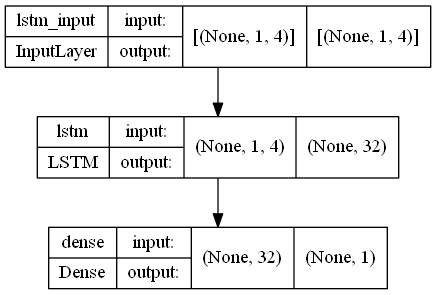

In [10]:
# Building the LSTM Model 
import tensorflow as tf 
lstm = tf.keras.Sequential()
# Adding layers
lstm.add(tf.keras.layers.LSTM(32, input_shape=(1, trainX.shape[1]), activation ='relu', return_sequences=False))
# Adding dense layer
lstm.add(tf.keras.layers.Dense(1))
lstm.compile(optimizer='adam', loss='mean_squared_error')
tf.keras.utils.plot_model(lstm, show_shapes=True, show_layer_names=True)

In [11]:
# Training Model
history =lstm.fit(X_train, y_train,epochs =350, batch_size=8, verbose=1, shuffle=False)

Epoch 1/350
141/141 [==============================] - 1s 1ms/step - loss: 7632.6523
Epoch 2/350
141/141 [==============================] - 0s 2ms/step - loss: 7474.1255
Epoch 3/350
141/141 [==============================] - 0s 1ms/step - loss: 7188.0576
Epoch 4/350
141/141 [==============================] - 0s 1ms/step - loss: 6725.8379
Epoch 5/350
141/141 [==============================] - 0s 1ms/step - loss: 6080.0923
Epoch 6/350
141/141 [==============================] - 0s 1ms/step - loss: 5286.2300
Epoch 7/350
141/141 [==============================] - 0s 1ms/step - loss: 4411.1992
Epoch 8/350
141/141 [==============================] - 0s 1ms/step - loss: 3532.5352
Epoch 9/350
141/141 [==============================] - 0s 1ms/step - loss: 2718.8149
Epoch 10/350
141/141 [==============================] - 0s 1ms/step - loss: 2017.9769
Epoch 11/350
141/141 [==============================] - 0s 1ms/step - loss: 1453.8357
Epoch 12/350
141/141 [==============================] - 0s 1ms/

141/141 [==============================] - 0s 1ms/step - loss: 4.7213
Epoch 196/350
141/141 [==============================] - 0s 1ms/step - loss: 4.7161
Epoch 197/350
141/141 [==============================] - 0s 1ms/step - loss: 4.7110
Epoch 198/350
141/141 [==============================] - 0s 1ms/step - loss: 4.7058
Epoch 199/350
141/141 [==============================] - 0s 1ms/step - loss: 4.7007
Epoch 200/350
141/141 [==============================] - 0s 1ms/step - loss: 4.6955
Epoch 201/350
141/141 [==============================] - 0s 1ms/step - loss: 4.6904
Epoch 202/350
141/141 [==============================] - 0s 1ms/step - loss: 4.6852
Epoch 203/350
141/141 [==============================] - 0s 1ms/step - loss: 4.6801
Epoch 204/350
141/141 [==============================] - 0s 1ms/step - loss: 4.6750
Epoch 205/350
141/141 [==============================] - 0s 1ms/step - loss: 4.6698
Epoch 206/350
141/141 [==============================] - 0s 1ms/step - loss: 4.6647
Epoch 

In [12]:
# LSTM Prediction
y_pred = lstm.predict(X_test)

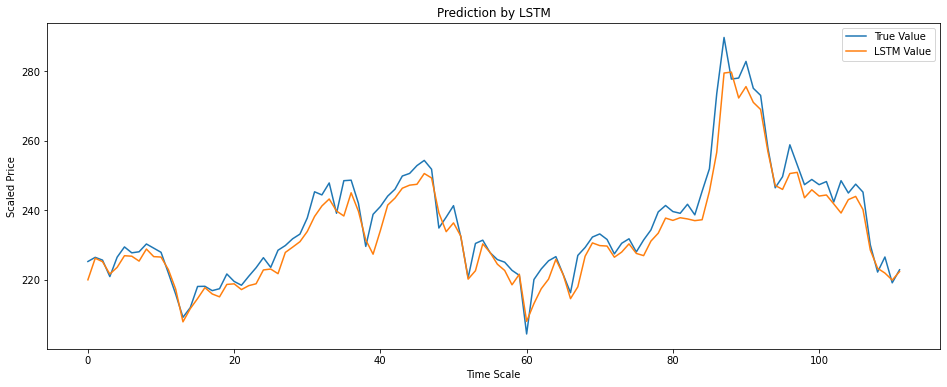

In [13]:
# Predicted vs True Close Value -LSTM
plt.plot(y_test, label='True Value')

plt.plot(y_pred, label ='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()

In [24]:
X_test

array([[[0.7270841 , 0.755004  , 0.74205643, 0.18513351]],

       [[0.76650318, 0.75955499, 0.76652849, 0.21690687]],

       [[0.75273481, 0.75652103, 0.77896192, 0.13244003]],

       [[0.74820823, 0.73850662, 0.7621867 , 0.0942786 ]],

       [[0.74217275, 0.75974463, 0.77264652, 0.09952135]],

       [[0.75726139, 0.77093252, 0.78942173, 0.08303279]],

       [[0.76442848, 0.76448527, 0.78863232, 0.06406856]],

       [[0.75122591, 0.76562303, 0.78310633, 0.07197038]],

       [[0.76518296, 0.77415617, 0.79731595, 0.11088912]],

       [[0.76480572, 0.76960518, 0.78350107, 0.06734798]],

       [[0.76103355, 0.76505418, 0.7896191 , 0.05466015]],

       [[0.7640513 , 0.74248871, 0.7584369 , 0.11161874]],

       [[0.73726893, 0.71935444, 0.73810932, 0.10653448]],

       [[0.69124857, 0.69394465, 0.69390171, 0.13188034]],

       [[0.70067897, 0.70456362, 0.72172884, 0.09041188]],

       [[0.70633721, 0.72769795, 0.73534635, 0.05890211]],

       [[0.7270841 , 0.72788758, 0.75172

In [25]:
X_test.shape

(112, 1, 4)

(112,)